<a href="https://colab.research.google.com/github/tanjascats/BeyondCoding-workshop/blob/main/BeyondCoding_L7_Privacy_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Coding Workshop: 
## L7: Privacy from a developer's perspective

### Contents:
1. Anonymisation using crowds
2. Synthetic data generation

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Make sure you adapt this to your specific folder structure!
%ls
%cd /content/drive/MyDrive/BeyondCoding_L7_Workshop/data
%ls

Mounted at /content/drive
drive/  sample_data/
/content/drive/.shortcut-targets-by-id/12YZQE2P3JGI6dNh6ZNaCuDtd9NOgHlOO/BeyondCoding_L7_Workshop/data
adult.csv        age_level3.json        native-country_level1.json
age_level1.json  education_level1.json
age_level2.json  education_level2.json


In [ ]:
!pip install crowds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import seaborn as sns

from crowds.kanonymity.ola import anonymize
from crowds.kanonymity.information_loss import entropy_loss
from crowds.kanonymity.generalizations import GenRule

from sklearn.linear_model import LogisticRegression

In [ ]:
# import data
adult = pd.read_csv('adult.csv')
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   marital-status  30162 non-null  object
 4   occupation      30162 non-null  object
 5   relationship    30162 non-null  object
 6   race            30162 non-null  object
 7   sex             30162 non-null  object
 8   capital-gain    30162 non-null  int64 
 9   capital-loss    30162 non-null  int64 
 10  hours-per-week  30162 non-null  int64 
 11  native-country  30162 non-null  object
 12  salary-class    30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.0+ MB


In [ ]:
def generalise_marital_status(value):
  if value in ['Married-AF-spouse','Married-civ-spouse']:
    return 'spouse-present'
  elif value in ['Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent']:
    return 'spouse-not-present'

In [ ]:
def generalise_workclass(value):
  if value in ['Private', 'Self-emp-not-inc', 'Self-emp-inc']:
    return 'Non-Government'
  elif value in ['Local-gov', 'Federal-gov', 'State-gov']:
    return 'Government'
  elif value in ['Without-pay', 'Never-worked']:
    return 'Unemployed'

In [ ]:
# the below generalisations will be uploaded from the json-s
with open('education_level1.json', 'rb') as infile:
    education_level_1 = json.load(infile) 
def generalise_education_level1(value):
  # load dict of the first level
  # dict level_1
  if value in education_level_1:
    return education_level_1[value]

In [ ]:
with open('education_level2.json', 'rb') as infile:
  education_level_2 = json.load(infile)
def generalise_education_level2(value):
  if value in education_level_2:
    return education_level_2[value]
  else:
    print(value)

In [ ]:
with open('age_level1.json', 'rb') as infile:
  age_level1 = json.load(infile)
def generalise_age_level1(value):
  if str(value) in age_level1:
    return age_level1[str(value)]

In [ ]:
with open('age_level2.json', 'rb') as infile:
  age_level2 = json.load(infile)
def generalise_age_level2(value):
  if str(value) in age_level2:
    return age_level2[str(value)]

In [ ]:
with open('age_level3.json', 'rb') as infile:
  age_level3 = json.load(infile)
def generalise_age_level3(value):
  if str(value) in age_level3:
    return age_level3[str(value)]

In [ ]:
with open('native-country_level1.json', 'rb') as infile:
  nc_level1 = json.load(infile)
def generalise_native_country(value):

  if value in nc_level1:
    return nc_level1[value]

In [ ]:
generalization_rules = {
    'sex': GenRule([]), # 1 level
    'age': GenRule([generalise_age_level1, generalise_age_level2, generalise_age_level3]), # 4-levels generalization
    'race': GenRule([]), # 1 level
    'marital-status': GenRule([generalise_marital_status]), # 2 levels
    'education': GenRule([generalise_education_level1, generalise_education_level2]), # 3 levels
    'native-country': GenRule([generalise_native_country]), # 2 levels
    'workclass': GenRule([generalise_workclass]) # 2 levels
}

adult_anonymised, transformation = anonymize(adult, generalization_rules=generalization_rules, k=7, max_sup=0.0, info_loss=entropy_loss)

In [ ]:
adult_anonymised

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,35-39,None,None,spouse-not-present,Adm-clerical,Not-in-family,None,None,2174,0,40,None,<=50K
1,35-39,None,None,spouse-not-present,Handlers-cleaners,Not-in-family,None,None,0,0,40,None,<=50K
2,35-39,None,None,spouse-not-present,Exec-managerial,Not-in-family,None,None,0,0,80,None,<=50K
3,35-39,None,None,spouse-not-present,Craft-repair,Unmarried,None,None,0,0,40,None,<=50K
4,35-39,None,None,spouse-not-present,Machine-op-inspct,Own-child,None,None,0,0,40,None,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,80-84,None,None,spouse-not-present,Sales,Not-in-family,None,None,0,0,50,None,<=50K
30158,80-84,None,None,spouse-not-present,Sales,Not-in-family,None,None,0,0,20,None,<=50K
30159,80-84,None,None,spouse-not-present,Sales,Not-in-family,None,None,0,0,50,None,>50K
30160,80-84,None,None,spouse-not-present,Prof-specialty,Not-in-family,None,None,0,0,16,None,<=50K


In [ ]:
transformation

{'age': 1,
 'education': 3,
 'marital-status': 1,
 'native-country': 2,
 'race': 1,
 'sex': 1,
 'workclass': 2}

Anonymisation in ARX yields the same transformation. -> ARX demo

<AxesSubplot:>

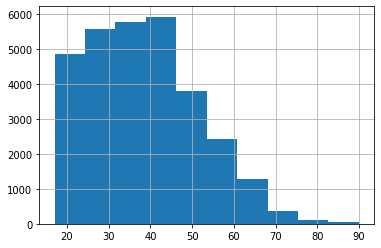

In [ ]:
# utility loss via Machine Learning process
# baseline
adult.age.hist()

<AxesSubplot:xlabel='count', ylabel='workclass'>

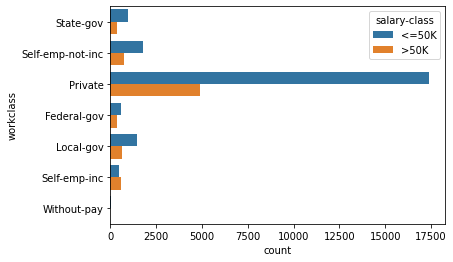

In [ ]:
sns.countplot(y='workclass', hue='salary-class', data=adult)

<AxesSubplot:xlabel='count', ylabel='education'>

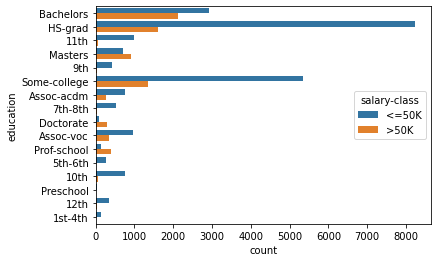

In [ ]:
sns.countplot(y='education', hue='salary-class', data=adult)

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnsSelector(BaseEstimator, TransformerMixin):
  
  def __init__(self, type):
    self.type = type
  
  def fit(self, X, y=None):
    return self
  
  def transform(self,X):
    return X.select_dtypes(include=[self.type])

num_pipeline = Pipeline(steps=[("num_selector", ColumnsSelector(type='int')),
                               ('scaler', StandardScaler())])
cat_pipeline = Pipeline(steps=[("cat_selector", ColumnsSelector(type='object')),
                               ('onehot_encoder', OneHotEncoder())])

preprocessing_pipeline = FeatureUnion([('numerical_pipeline', num_pipeline),
                                       ('categorical_pipeline', cat_pipeline)])

In [ ]:
X = adult.drop('salary-class', axis=1)
y = adult['salary-class']

In [ ]:
X_processed = preprocessing_pipeline.fit_transform(X)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_model = LogisticRegression(random_state=0)
scores = cross_val_score(cross_val_model, X_processed, y, cv=5)

In [ ]:
scores

array([0.84518482, 0.84137245, 0.85029841, 0.8522878 , 0.8494695 ])

In [ ]:
np.mean(scores)

0.847722594255028

In [ ]:
# ANONYMISED DATA

In [ ]:
X_anon = adult_anonymised.drop('salary-class', axis=1)
y_anon = adult_anonymised['salary-class']

In [ ]:
X_anon.dropna(axis=1, inplace=True)

In [ ]:
X_anon

,age,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
0,35-39,spouse-not-present,Adm-clerical,Not-in-family,2174,0,40
1,35-39,spouse-not-present,Handlers-cleaners,Not-in-family,0,0,40
2,35-39,spouse-not-present,Exec-managerial,Not-in-family,0,0,80
3,35-39,spouse-not-present,Craft-repair,Unmarried,0,0,40
4,35-39,spouse-not-present,Machine-op-inspct,Own-child,0,0,40
...,...,...,...,...,...,...,...
30157,80-84,spouse-not-present,Sales,Not-in-family,0,0,50
30158,80-84,spouse-not-present,Sales,Not-in-family,0,0,20
30159,80-84,spouse-not-present,Sales,Not-in-family,0,0,50
30160,80-84,spouse-not-present,Prof-specialty,Not-in-family,0,0,16


<AxesSubplot:xlabel='count', ylabel='age'>

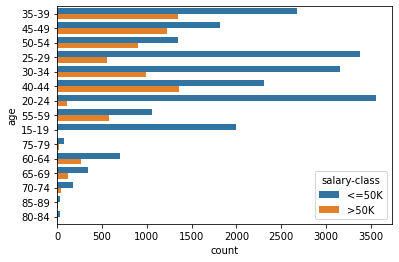

In [ ]:
sns.countplot(y='age', hue='salary-class', data=adult_anonymised)

In [ ]:
X_anon_processed = cat_pipeline.fit_transform(X_anon)

In [ ]:
cross_val_model = LogisticRegression(random_state=0)
scores = cross_val_score(cross_val_model, X_anon_processed, y_anon, cv=5)

In [ ]:
scores 

array([0.59970164, 0.70611636, 0.71651194, 0.61538462, 0.75165782])

## 2. Synthetic data

In [ ]:
!pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sdv import SDV
from sdv.tabular import GaussianCopula

In [ ]:
model = GaussianCopula()
model.fit(adult)
model.get_distributions()

{'age.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'capital-gain.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'capital-loss.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'education.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'hours-per-week.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'marital-status.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'native-country.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'occupation.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'race.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'relationship.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'salary-class.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'sex.value': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'workclass.value': 'copulas.univariate.t

In [ ]:
adult_syn = model.sample(num_rows=len(adult))
adult_syn.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,41,Private,Some-college,Divorced,Craft-repair,Not-in-family,White,Male,14399,350,51,United-States,>50K
1,21,Self-emp-inc,HS-grad,Married-spouse-absent,Exec-managerial,Unmarried,White,Female,11387,339,34,United-States,<=50K
2,49,Private,Bachelors,Never-married,Prof-specialty,Own-child,Black,Male,13018,796,45,Mexico,>50K
3,17,Private,HS-grad,Never-married,Sales,Husband,White,Male,1939,179,44,United-States,<=50K
4,24,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Female,3002,190,44,United-States,<=50K


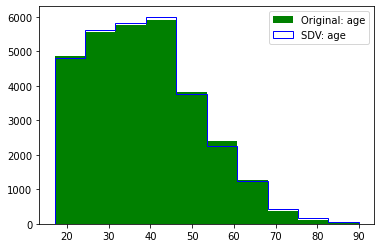

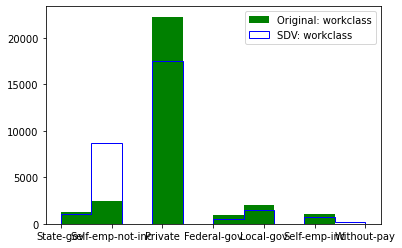

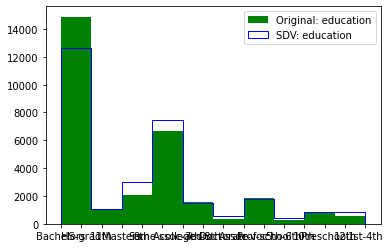

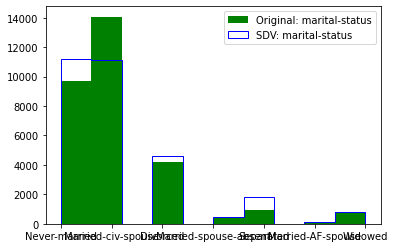

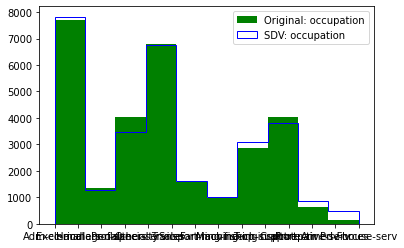

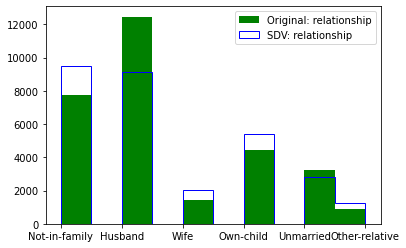

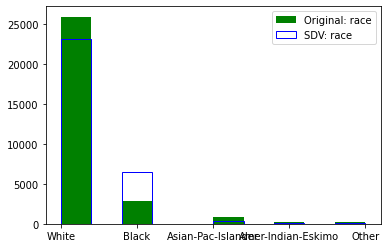

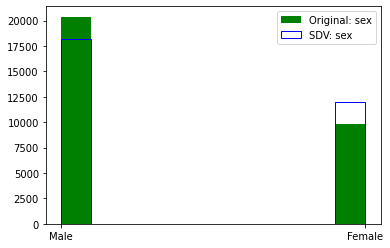

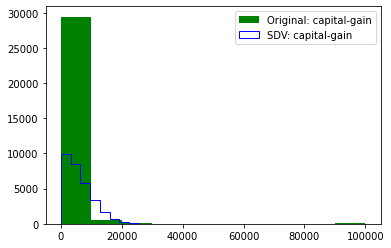

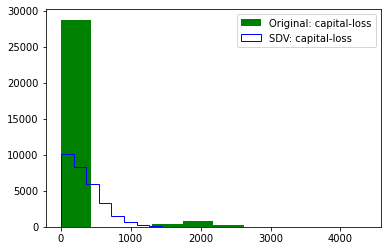

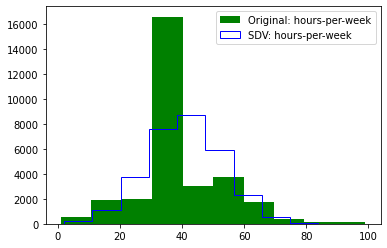

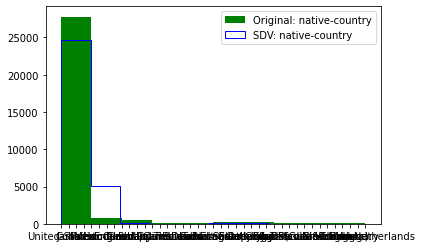

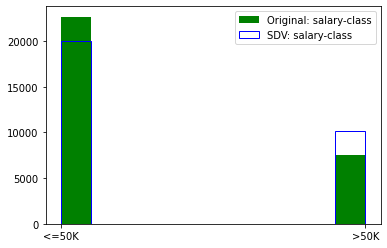

In [ ]:
# Plot Attribute histograms
header = list(adult.columns.values)

for i in range(len(header)):
  plt.hist(adult.iloc[:,i], color='green', label='Original: '+header[i])
  plt.legend()
  plt.hist(adult_syn.iloc[:,i],histtype='step', color='blue', label='SDV: '+header[i])
  plt.legend()
  plt.show()

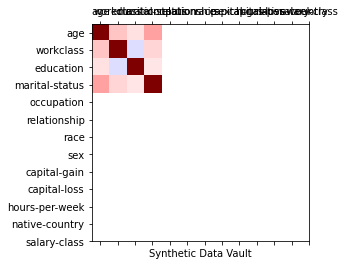

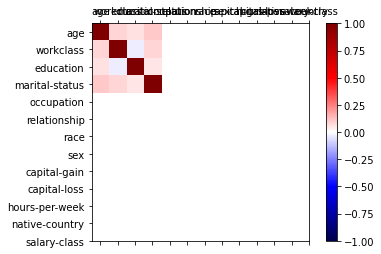

In [ ]:
# Plot correlations        
correlations_syn = adult_syn.corr()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations_syn, cmap='seismic', vmin=-1, vmax=1)
ticks = np.arange(0,len(header),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(header)
ax.set_yticklabels(header)
ax.set_xlabel("Synthetic Data Vault")
plt.show()

correlations_real = adult.corr()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations_real, cmap='seismic', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(header),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(header)
ax.set_yticklabels(header)
plt.show()


In [ ]:
X_syn = adult_syn.drop('salary-class', axis=1)
y_syn = adult_syn['salary-class']

X_syn_processed = preprocessing_pipeline.fit_transform(X_syn)

cross_val_model = LogisticRegression(random_state=0)
scores = cross_val_score(cross_val_model, X_syn_processed, y, cv=5)
scores

array([0.75103597, 0.75103597, 0.75116048, 0.75116048, 0.75099469])